In [111]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import copy
import pickle

import numpy as np
import matplotlib.pyplot as plt

import sep
import astroalign as aa

from astropy.table import Table, Column

from matplotlib import rc
rc('text', usetex=False)

np.random.seed(seed=12)
aa.__version__

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'2.1'

In [105]:
example = '/Users/song/Dropbox/Shared/for_jean/globhunt/perseus_h355.p'

data = pickle.load(open(example, 'rb'))

In [106]:
i_img = data['i']['img']
g_img = data['g']['img']
r_img = data['r']['img']

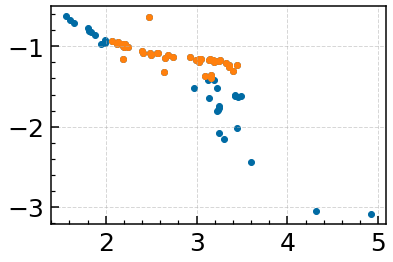

In [107]:
i_obj = sep.extract(i_img, 5.0)

i_use = (np.log10(i_obj['peak'] / i_obj['flux']) >= -1.4) & (np.log10(i_obj['flux']) >= 2.)

plt.scatter(np.log10(i_obj['flux']), np.log10(i_obj['peak'] / i_obj['flux']))
plt.scatter(np.log10(i_obj['flux'][i_use]), np.log10(i_obj['peak'][i_use] / i_obj['flux'][i_use]))

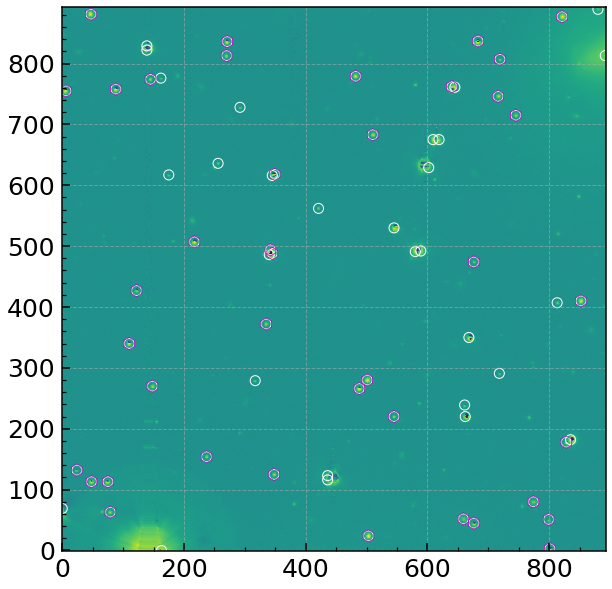

In [108]:
plt.figure(figsize=(10, 10))

plt.imshow(np.arcsinh(i_img - r_img), interpolation='none', origin='lower')

plt.scatter(i_obj['xpeak'], i_obj['ypeak'], facecolor='none', edgecolor='w', s=100, alpha=1.0)
plt.scatter(i_obj['xpeak'][i_use], i_obj['ypeak'][i_use], facecolor='none', edgecolor='m', s=150, marker='h', alpha=0.8)

In [109]:
i_src = np.array([[x, y] for x, y in zip(i_obj['x'], i_obj['y'])], dtype="float64")

i_trn, (i_pos, r_pos) = aa.find_transform(r_img, i_src)

r_align, footprint = aa.apply_transform(i_trn, r_img, i_img)

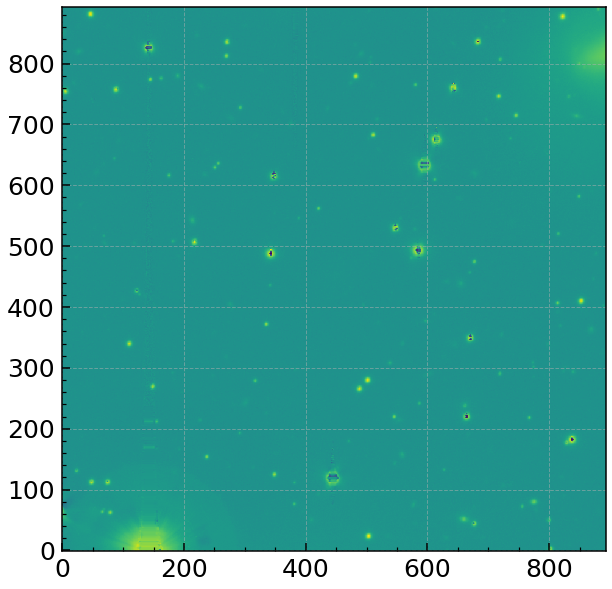

In [110]:
plt.figure(figsize=(10, 10))

plt.imshow(np.arcsinh(i_img - r_align), interpolation='none', origin='lower')

In [112]:
data_new = copy.deepcopy(data)
data_new['r']['img'] = r_align

example_new = '/Users/song/Dropbox/Shared/for_jean/globhunt/perseus_h355_new.p'

pickle.dump(data_new, open(example_new, 'wb'))